<a href="https://colab.research.google.com/github/ShaiSundar511/dash-heroku/blob/main/5_H_Bonus_Topic_Modeling_with_LDA_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [19]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Import Plotly

In [20]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [21]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### Gensim package

In [22]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### pyLDAVis package

In [23]:
!pip install pyLDAvis

In [24]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


### NLTK Package

In [25]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import Text Data

In [26]:
df = pd.read_csv('/content/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


,Article,Date,Heading,NewsType
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business
2691,strong>KARACHI: Karachi-based technology incub...,3/27/2017,Google powered Startup Weekend energizing prou...,business


# Tokenize: Parse each sentence to words/terms/tokens

In [27]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

,Article,Date,Heading,NewsType,token
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[karachi, the, sindh, government, has, decided..."
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[hong, kong, asian, markets, started, on, an, ..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[hong, kong, hong, kong, shares, opened, perce..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[hong, kong, asian, markets, tumbled, tuesday,..."
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[new, york, us, oil, prices, monday, slipped, ..."


# Making Bigram and Trigram models

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['token'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['token']], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


# Remove Stop words

## Define stop word removal functions

In [29]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Now, use stop word removal functions

In [30]:
display('before: ', df['token'].head())

'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

In [31]:
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [32]:
display('after: ' ,df['token'].head())

'after: '

0    [government, decide, bring, public, transport,...
1    [market, start, upswe, limited, trading, mainl...
2    [share, open, percent, low, follow, tepid, lea...
3    [tumble, follow, painful, loss, sit, year, low...
4    [oil, price, slip, barrel, first, time, year, ...
Name: token, dtype: object

# Creating Corpus and Vocubulary

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

# Create Corpus
texts = df['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])
# id2word[0]

In [34]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('add', 1),
  ('applicable', 1),
  ('bring', 1),
  ('cent', 1),
  ('charge', 1),
  ('commuter', 1),
  ('compare', 1),
  ('compress', 1),
  ('country', 1),
  ('cut', 1),
  ('decide', 1),
  ('decision', 1),
  ('decrease', 1),
  ('due', 1),
  ('fare', 4),
  ('federal', 1),
  ('gas', 1),
  ('government', 3),
  ('irshad', 1),
  ('low', 1),
  ('make', 1),
  ('massive', 1),
  ('mean', 1),
  ('meanwhile', 1),
  ('natural', 1),
  ('news', 1),
  ('part', 1),
  ('pc', 1),
  ('petroleum', 1),
  ('price', 2),
  ('product', 1),
  ('public', 2),
  ('reduction', 2),
  ('refuse', 1),
  ('report', 1),
  ('rickshaw', 1),
  ('run', 1),
  ('say', 3),
  ('source', 1),
  ('taxi', 1),
  ('transport', 2),
  ('transporter', 1),
  ('travel', 1),
  ('vehicle', 1)]]

# Build LDA Model

In [35]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=15, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [36]:
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['token'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.521265219557464

Coherence Score:  0.44372062265071704


# Making Word2Vec Model

## Printing the corpus

In [39]:
display(texts)

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

## Training word2vec model

In [40]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

In [41]:
list_1 = w2vmodel.wv.most_similar('use',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)

word_list_1 = []

for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

['provide', 'system', 'insurance', 'garment', 'operation', 'delegation', 'organizer', 'governance', 'construction', 'authority']


## Visualizing w2v

In [42]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      size_max=55, 
      text = labels,
      range_x=[-50, 50], 
      range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
# pass

In [43]:
tsne_plot(w2vmodel)

In [44]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('say', 6599), ('year', 3641), ('percent', 3304), ('strong', 2330), ('first', 2110), ('last', 1945), ('also', 1945), ('price', 1854), ('oil', 1814), ('market', 1806), ('make', 1743), ('take', 1602), ('would', 1549), ('team', 1504), ('day', 1469), ('match', 1463), ('test', 1458), ('run', 1373), ('month', 1372), ('time', 1358), ('play', 1357), ('world', 1260), ('week', 1250), ('wicket', 1237), ('country', 1219), ('high', 1200), ('add', 1141), ('second', 1085), ('fall', 1041), ('come', 1022), ('ball', 1016), ('rise', 1003), ('could', 961), ('low', 948), ('go', 925), ('crude', 917), ('government', 916), ('player', 908), ('see', 878), ('rate', 872), ('global', 818), ('final', 817), ('good', 814), ('early', 813), ('dollar', 801), ('lead', 800), ('cricket', 782), ('include', 775), ('game', 774), ('give', 768), ('get', 766), ('start', 763), ('win', 755), ('new', 749), ('point', 748), ('expect', 747), ('end', 742), ('leave', 741), ('barrel', 740), ('tell', 737), ('score', 712), ('increase', 70

# Solution 

I was trying to get this working - https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/11-Topic-Modeling-Time-Series.html

My idea was to - add topic with heading for each sentence, and then show the topics usage over time on a plot....

However I ran into issues with the pandas data format and i was not able to add topic for each sentence. My implementation and try is shown below - 

Also, I came up with a simpler Alternative Solution

In [49]:
# your code: second word cloud after removing stop words 

!pip install little_mallet_wrapper
!pip install seaborn

In [50]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip -q mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet'

In [105]:
trump_df = pd.read_csv('/content/news_articles.csv', encoding='latin-1')
display(df.head())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due...,1/1/2015,sindh govt decides to cut public transport fares by 7pc kti rej,business
1,"HONG KONG: Asian markets started 2015 on an upswing in limited trading on Friday, with mainland ...",1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 percent lower Monday following a tepid lead from Wall S...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday following painful losses in New York and Europe while t...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $50 a barrel for the first time in more than five y...,1/6/2015,us oil prices slip below 50 a barr,business


In [106]:
trump_df['Article'] = trump_df['Article'].astype(str)

In [107]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in trump_df['Article']]

In [108]:
original_trump_tweets = [title for title in trump_df['Article']]

In [109]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 2692
Mean Number of Words per Document: 178.2
Vocabulary Size: 25276


In [110]:
num_topics = 5

In [111]:
output_directory_path = '/content/'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [112]:
little_mallet_wrapper.quick_train_topic_model(mallet_path,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['first',
   'england',
   'test',
   'two',
   'runs',
   'match',
   'three',
   'captain',
   'pakistan',
   'wickets',
   'wicket',
   'sri',
   'lanka',
   'one',
   'four',
   'second',
   'ball',
   'balls',
   'overs',
   'innings'],
  ['said',
   'pakistan',
   'billion',
   'year',
   'government',
   'million',
   'minister',
   'also',
   'country',
   'would',
   'strong',
   'new',
   'percent',
   'tax',
   'china',
   'islamabad',
   'economic',
   'bank',
   'power',
   'last'],
  ['said',
   'cricket',
   'team',
   'pakistan',
   'world',
   'strong',
   'players',
   'year',
   'india',
   'first',
   'england',
   'test',
   'also',
   'one',
   'time',
   'play',
   'game',
   'last',
   'match',
   'cup'],
  ['percent',
   'oil',
   'said',
   'prices',
   'crude',
   'market',
   'year',
   'week',
   'dollar',
   'global',
   'markets',
   'last',
   'since',
   'strong',
   'opec',
   'barrel',
   'million',
   'month',
   'also',
   'production'],
  ['said'

In [113]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['first', 'england', 'test', 'two', 'runs', 'match', 'three', 'captain', 'pakistan', 'wickets', 'wicket', 'sri', 'lanka', 'one', 'four', 'second', 'ball', 'balls', 'overs', 'innings']

✨Topic 1✨

['said', 'pakistan', 'billion', 'year', 'government', 'million', 'minister', 'also', 'country', 'would', 'strong', 'new', 'percent', 'tax', 'china', 'islamabad', 'economic', 'bank', 'power', 'last']

✨Topic 2✨

['said', 'cricket', 'team', 'pakistan', 'world', 'strong', 'players', 'year', 'india', 'first', 'england', 'test', 'also', 'one', 'time', 'play', 'game', 'last', 'match', 'cup']

✨Topic 3✨

['percent', 'oil', 'said', 'prices', 'crude', 'market', 'year', 'week', 'dollar', 'global', 'markets', 'last', 'since', 'strong', 'opec', 'barrel', 'million', 'month', 'also', 'production']

✨Topic 4✨

['said', 'year', 'world', 'time', 'one', 'strong', 'first', 'two', 'last', 'open', 'rio', 'second', 'number', 'set', 'ali', 'olympic', 'champion', 'president', 'won', 'old']



In [114]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)
tweet_dict = dict(zip(training_data, original_trump_tweets))

def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['said', 'pakistan', 'billion', 'year', 'government', 'million', 'minister', 'also', 'country', 'would', 'strong', 'new', 'percent', 'tax', 'china', 'islamabad', 'economic', 'bank', 'power', 'last']

0.9995 strong>SEOUL: At an Innisfree cosmetics store in Seoul's popular Myeongdong shopping district, a saleswoman helps 21-year-old Chinese tourist Yang Hui carry her shopping baskets to the pay desk in front of a large display showing K-Pop star Yoona</strong>."There's a lot to choose from," said Yang, confessing to having bought more than she'd planned from the store's range of around 900 products.South Korea's top cosmetics company Amorepacific Group (002790.KS) launches some 400 new Innisfree branded products a year, about half of which are no longer available a year later.It's one of dozens of Korean mass cosmetics brands with a short product development cycle - a "fast beauty" approach that is increasingly popular among Chinese and other Asian millennials, gaining exposur

In [115]:
trump_df['Date'] = pd.to_datetime(trump_df['Date'])
trump_df['year'] = pd.to_datetime(trump_df['Date'].dt.year, format='%Y')
trump_df['year-month'] = trump_df['Date'].dt.to_period('M')
trump_df['Date (by month)'] = [month.to_timestamp() for month in trump_df['year-month']]
trump_df = trump_df.set_index('Date (by month)')

In [121]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)
trump_df['topic_distributions'] = pd.Series(topic_distributions)
topic_distributions_df = trump_df['topic_distributions'].apply(pd.Series)
topic_distributions_df.columns = [str(join(topic[:3]) for topic in topics)]
print(topic_distributions)
#trump_df['topic'] = [" ".join(topic[:1]) for topic in topics]
trump_df = pd.concat([trump_df, topic_distributions_df], axis=1)

[[0.0009740470791301423, 0.9958854421757127, 0.0013156673252195368, 0.00100430006576181, 0.0008205433541758385], [0.00014910707837736506, 0.09670345771651342, 0.00020140228864013333, 0.9028204241806651, 0.000125608735804007], [0.00263461537695327, 0.003867719469783834, 0.1550975835978098, 0.8361806650768379, 0.0022194164786152365], [0.012622814068651391, 0.0003166658554363609, 0.00029135980264885806, 0.9710785633600825, 0.01569059691318086], [0.0001790516619505117, 0.0002628549142622842, 0.00024184911202127594, 0.9914413317422712, 0.007874912569494692], [0.00045041962796706206, 0.033045523066109, 0.0006083919348980727, 0.8748402191421385, 0.09105544622888737], [0.0009347687984840594, 0.1761131976008925, 0.0012626132670080963, 0.8074603560125917, 0.014229064321023674], [0.0005974690739357699, 0.0008771082071673802, 0.0008070149331061659, 0.9972150960994793, 0.0005033116863113005], [0.038758494585932536, 0.807217947196275, 0.0017591851271197432, 0.15116722061363433, 0.0010971524770383861

In [119]:
topic_number = 2

topic_label = " ".join(topics[topic_number][:3])

trump_df[topic_label].plot(style='.', title=f'Trump Tweets By Topic: \n{topic_label.title()}')

KeyError: ignored

In [118]:
trump_df

,Article,Date,Heading,NewsType,year,year-month,topic_distributions,<generator object <genexpr> at 0x7f8b0e202650>
Date (by month),,,,,,,,
2015-01-01,KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due...,2015-01-01,sindh govt decides to cut public transport fares by 7pc kti rej,business,2015-01-01,2015-01,NaN,NaN
2015-01-01,"HONG KONG: Asian markets started 2015 on an upswing in limited trading on Friday, with mainland ...",2015-01-02,asia stocks up in new year trad,business,2015-01-01,2015-01,NaN,NaN
2015-01-01,HONG KONG: Hong Kong shares opened 0.66 percent lower Monday following a tepid lead from Wall S...,2015-01-05,hong kong stocks open 0.66 percent lower,business,2015-01-01,2015-01,NaN,NaN
2015-01-01,HONG KONG: Asian markets tumbled Tuesday following painful losses in New York and Europe while t...,2015-01-06,asian stocks sink euro near nine year,business,2015-01-01,2015-01,NaN,NaN
2015-01-01,NEW YORK: US oil prices Monday slipped below $50 a barrel for the first time in more than five y...,2015-01-06,us oil prices slip below 50 a barr,business,2015-01-01,2015-01,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-03-01,strong>DUBAI: Dubai International Airport and its flag carrier Emirates began implementing a ban...,2017-03-25,Laptop ban hits Dubai for 11m weekend traveller,business,2017-01-01,2017-03,NaN,NaN
2017-03-01,"strong>BEIJING: Former Prime Minister, Shaukat Aziz said on Sunday that the relationship between...",2017-03-26,Pak China relations not against any third country Shaukat Aziz,business,2017-01-01,2017-03,NaN,NaN
2017-03-01,strong>WASHINGTON: Uber has grounded its fleet of self-driving cars pending an investigation int...,2017-03-26,Uber grounds self driving cars after accid,business,2017-01-01,2017-03,NaN,NaN


In [172]:
print(word_freq.most_common(100))
word1 = word_freq.most_common(1)[0][0]
word2 = word_freq.most_common(2)[1][0]
word3 = word_freq.most_common(3)[2][0]
word4 = word_freq.most_common(4)[3][0]
word5 = word_freq.most_common(5)[4][0]
print(word1, word2, word3, word4, word5)

[('say', 6599), ('year', 3641), ('percent', 3304), ('strong', 2330), ('first', 2110), ('last', 1945), ('also', 1945), ('price', 1854), ('oil', 1814), ('market', 1806), ('make', 1743), ('take', 1602), ('would', 1549), ('team', 1504), ('day', 1469), ('match', 1463), ('test', 1458), ('run', 1373), ('month', 1372), ('time', 1358), ('play', 1357), ('world', 1260), ('week', 1250), ('wicket', 1237), ('country', 1219), ('high', 1200), ('add', 1141), ('second', 1085), ('fall', 1041), ('come', 1022), ('ball', 1016), ('rise', 1003), ('could', 961), ('low', 948), ('go', 925), ('crude', 917), ('government', 916), ('player', 908), ('see', 878), ('rate', 872), ('global', 818), ('final', 817), ('good', 814), ('early', 813), ('dollar', 801), ('lead', 800), ('cricket', 782), ('include', 775), ('game', 774), ('give', 768), ('get', 766), ('start', 763), ('win', 755), ('new', 749), ('point', 748), ('expect', 747), ('end', 742), ('leave', 741), ('barrel', 740), ('tell', 737), ('score', 712), ('increase', 70

In [173]:
#for i in trump_df:
  #if word1 in i["Article"]:
    #series.plot()
resdf = trump_df[trump_df['Article'].str.contains(word1)]
resdf2 = trump_df[trump_df['Article'].str.contains(word2)]
resdf3 = trump_df[trump_df['Article'].str.contains(word3)]
resdf4 = trump_df[trump_df['Article'].str.contains(word4)]
resdf5 = trump_df[trump_df['Article'].str.contains(word5)]

#from pandas import Grouper
#groups = trump_df["Article"].groupby(Grouper(freq=word1))

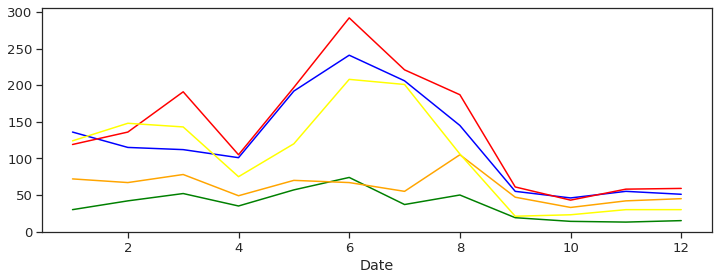

In [186]:
fig, axs = plt.subplots(figsize=(12, 4))
#fig=plt.figure(figsize=(8,6))
resdf.groupby(resdf["Date"].dt.month)["Article"].count().plot(kind='line', rot=0, ax=axs, color='green')
resdf2.groupby(resdf2["Date"].dt.month)["Article"].count().plot(kind='line', rot=0,ax=axs, color='blue')
resdf3.groupby(resdf3["Date"].dt.month)["Article"].count().plot(kind='line', rot=0, ax=axs, color='orange')
resdf4.groupby(resdf4["Date"].dt.month)["Article"].count().plot(kind='line', rot=0, ax=axs, color='red')
resdf5.groupby(resdf5["Date"].dt.month)["Article"].count().plot(kind='line', rot=0, ax=axs, color='yellow')

#Result

Here the colours in above graph represent use of common words over different month of a year - 

green -say

blue - year

orange - percent

red - strong

yellow - first